![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)


**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 2: Filtros media movil / filtro gaussiano
```

###**2.1. Importación de Librerías y creación de la señal de prueba**

* **Librerias a utilizar:**



In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

* **Creacion de una señal con ruido**

In [ ]:
fm = 1000 #frecuencia de muestreo
t = np.arange(0,3,1/fm) # variable independiente discreta
dimension_t = len(t)
print(dimension_t)

p=20

#Amplitud de ruido:
amplitud_ruido=3

senial = np.interp(np.linspace(0,p,dimension_t), np.arange(0,p),np.random.rand(p)*30)
#n numero de puntos dentro de 0 y p=20, interpolar numeros primera ,
#segunda , : numero de puntos por donde quiero q si pase
#tercera , : numeros aleatorios por donde pasara la funcion de prueba, para que la amplitud sea 30

#Ruido agregado:
ruido=amplitud_ruido * np.random.rand(dimension_t)

#Señal ruidosa:
senial_ruidosa=senial+ruido

3000


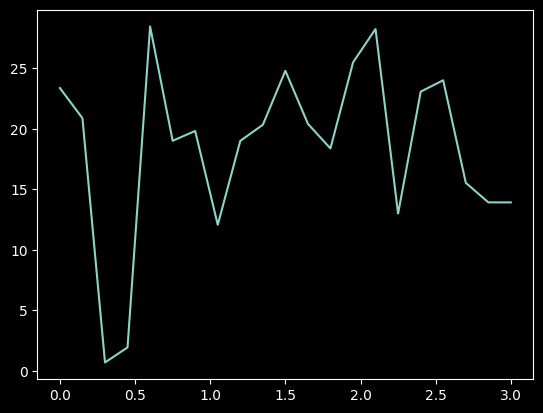

In [ ]:
plt.plot(t,senial)
plt.show()

* **Mostrando señales generadas:**

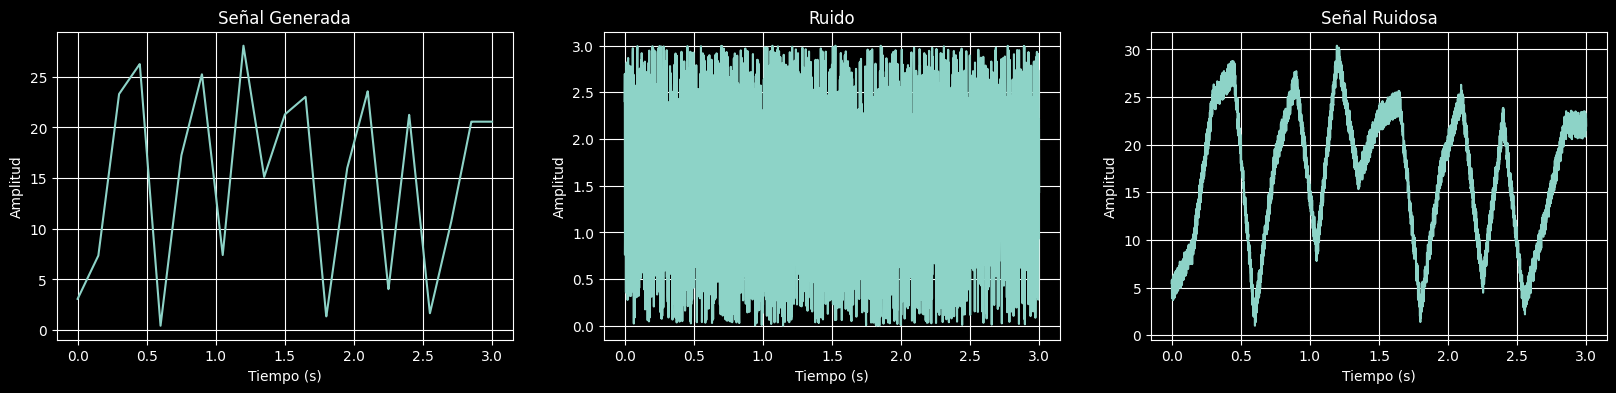

In [ ]:
plt.subplots(1,3,figsize=(20,4))
#Si la grafica es mayor que 10, agregar comas 1,3,1
#Se puede hacer con ciclo for
plt.subplot(131)
plt.plot(t,senial)
plt.grid(True)
plt.title('Señal Generada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(132)
plt.plot(t,ruido)
plt.grid(True)
plt.title('Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(133)
plt.plot(t,senial_ruidosa)
plt.grid(True)
plt.title('Señal Ruidosa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

### **2.2. Filtro media movil**

* **Estructura del filtro:**

![promedio movil.png](https://i.ibb.co/qgv7gP5/promedio-movil.png=100x20)

* **Mas referencias teóricas: **
1. [Media Movil](https://es.wikipedia.org/wiki/Media_m%C3%B3vil)
2. Consultar el libro [2] de la bibliografia del curso en la pagina 38.



* **Aplicación del filtro media movil:**

41.0


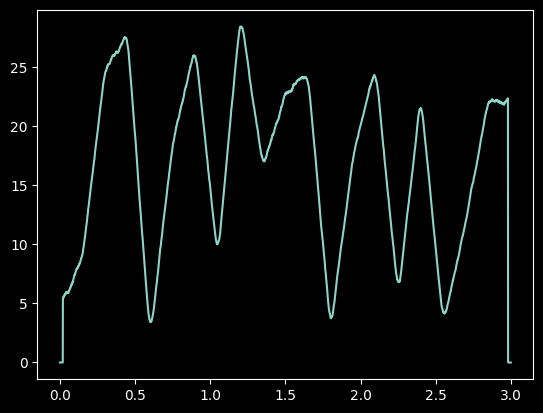

In [ ]:
#Existe una definición que puede tomar datos mitad pasado y mitad futuro
#Pero se utiliza para medios deterministicos como grabaciones, historia, etc
#Pero para sensores, ahora si podemos hablar de la forma gausal

#Orden del filtro n, debe ser impar para tomar la muestra central: 2k+1

k=20
senial_filtrada=np.zeros_like(senial_ruidosa)

for i in range(k,dimension_t-k+1):
    senial_filtrada[i] = np.mean(senial_ruidosa[i-k:i+k])

#Con esta metodologia, no se pierden datos o informacion q normalmente en arduino se haría

#Para el tamaño ventana:
tamanio_ventana = 1000*((2*k+1)/fm) #tamaño del filtro en milisegundos, tiempo de retardo
print(tamanio_ventana)
plt.plot(t,senial_filtrada)
plt.show()

* **Gráficas de los resutados:**

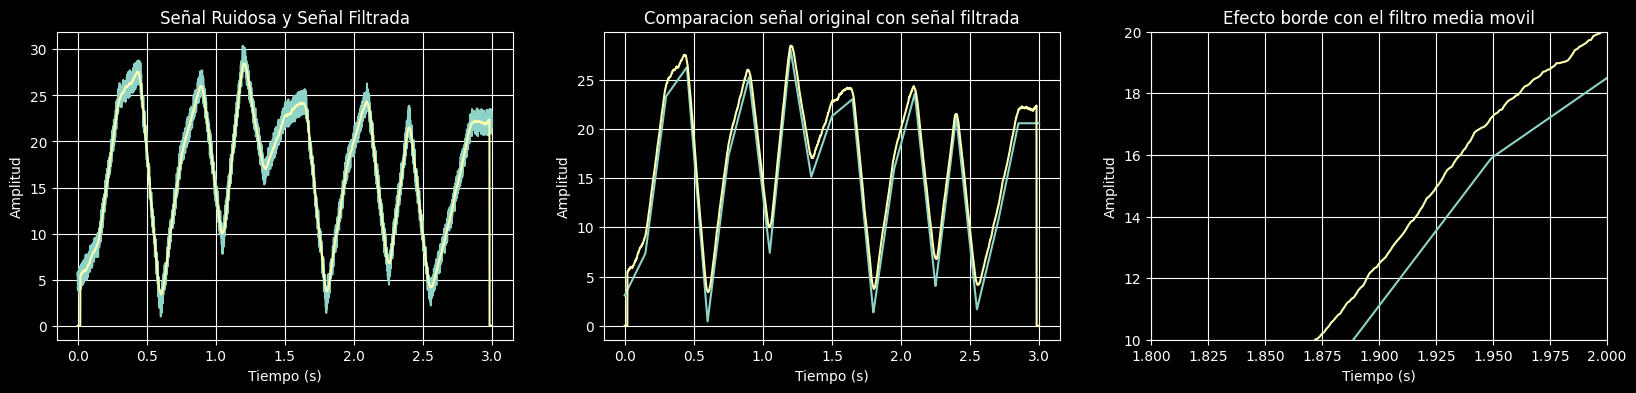

In [ ]:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t,senial_ruidosa)
plt.plot(t,senial_filtrada)
plt.grid(True)
plt.title('Señal Ruidosa y Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(132)
plt.plot(t,senial)
plt.plot(t,senial_filtrada)
plt.grid(True)
plt.title('Comparacion señal original con señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(133)
plt.plot(t,senial)
plt.plot(t,senial_filtrada)
plt.grid(True)
plt.title('Efecto borde con el filtro media movil')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axis([1.8,2,10,20])
plt.show()

### **2.3. Filtro Gaussiano**

* **Ecuacion para creacion del filtro:**

![Ecuacion Gaussiana](https://i.ibb.co/QCJZ27n/gauss-filter.png)


* **Referencias teoricas:**
1. [Filtro Gaussiano](https://en.wikipedia.org/wiki/Gaussian_filter)

2. [FWHM](https://https://en.wikipedia.org/wiki/Full_width_at_half_maximum#:~:text=In%20a%20distribution%2C%20full%20width,half%20of%20its%20maximum%20value.&text=If%20the%20FWHM%20of%20a,be%20integrated%20by%20simple%20multiplication.)

* **Creación del filtro gaussiano:**

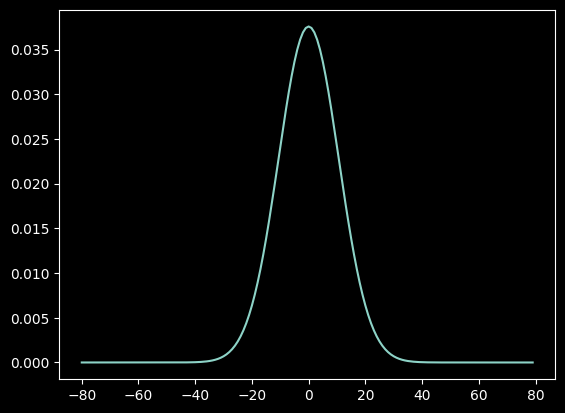

In [ ]:
#FWHM: Parametro de diseño anchura media altura, el ovalo q vamos a tener tiene influencia en el rizado y el tiempo de establecimiento
#Si es angosto, va a llegar muy rapido, pero si es ancho, tal vez no haya rizo pero mucho demora

#fm=11250

FWHM=25
k=80 #Orden del filtro

gauss_t = 1000*np.arange(-k,k)/fm

filtro_gaussiano = np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2)

#Como es un filtro, se necesita normalizarlo:
filtro_gaussiano_normalizado = filtro_gaussiano / np.sum(filtro_gaussiano)

plt.plot(gauss_t, filtro_gaussiano_normalizado)
plt.show()

* **Mostrando el filtro gaussiano construido:**

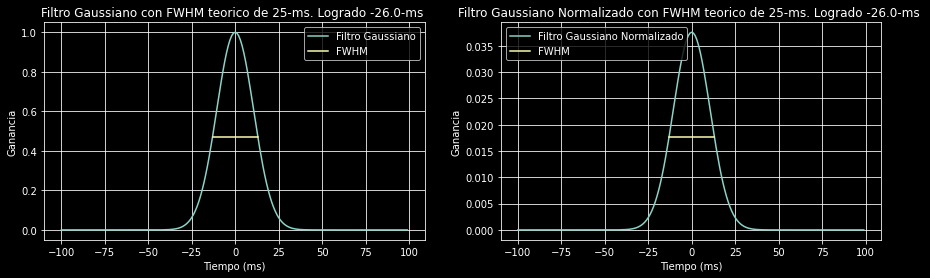

* **Aplicación del filtro Gaussiano:**

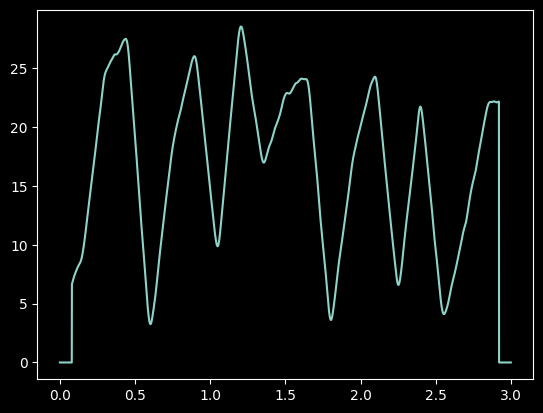

In [ ]:
senial_filtrada_gauss=np.zeros_like(senial_ruidosa)

for i in range(k,dimension_t-k+1):
    senial_filtrada_gauss[i] = np.sum(senial_ruidosa[i-k:i+k]*filtro_gaussiano_normalizado)

#tamanio_ventana = 1000*((2*k+1)/fm) #tamaño del filtro en milisegundos, tiempo de retardo
#print(tamanio_ventana)
plt.plot(t,senial_filtrada_gauss)
plt.show()

* **Mostrando los resultados:**

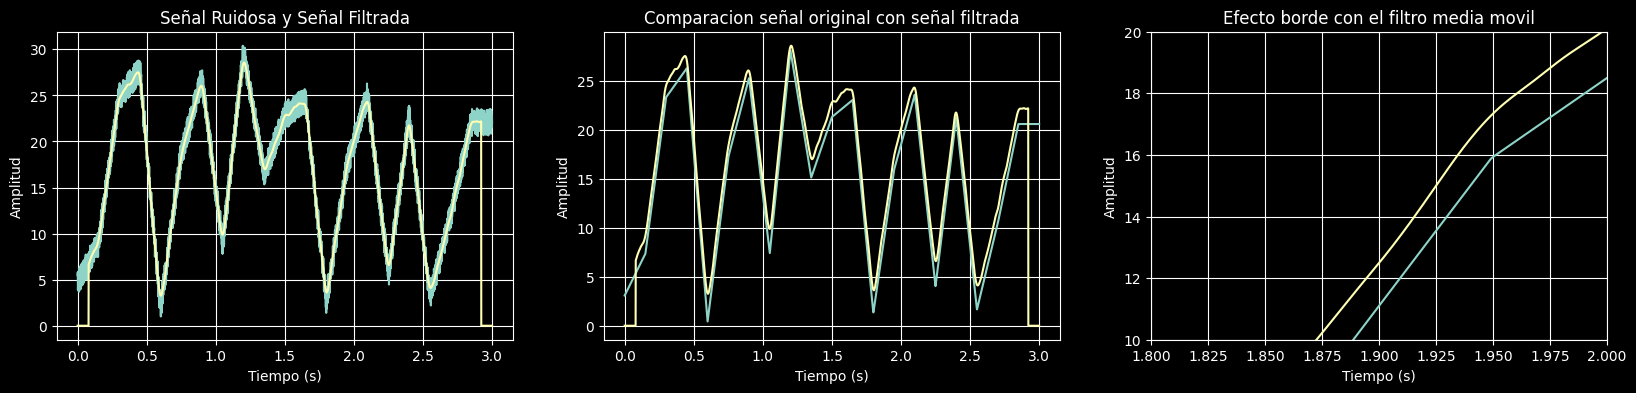

In [ ]:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t,senial_ruidosa)
plt.plot(t,senial_filtrada_gauss)
plt.grid(True)
plt.title('Señal Ruidosa y Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(132)
plt.plot(t,senial)
plt.plot(t,senial_filtrada_gauss)
plt.grid(True)
plt.title('Comparacion señal original con señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(133)
plt.plot(t,senial)
plt.plot(t,senial_filtrada_gauss)
plt.grid(True)
plt.title('Efecto borde con el filtro gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axis([1.8,2,10,20])
plt.show()

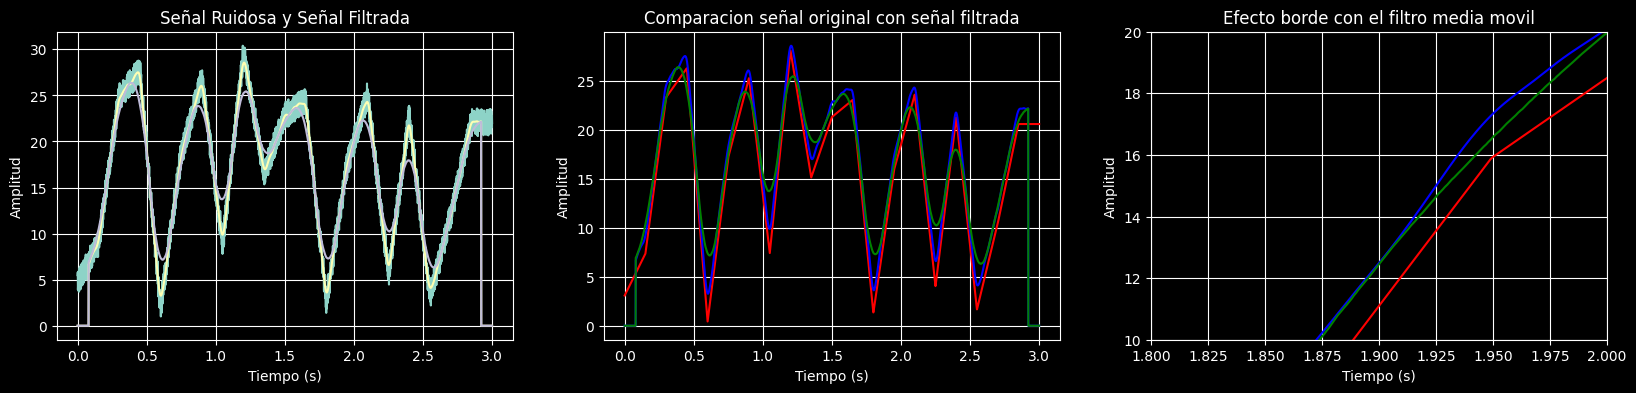

In [ ]:
#Comparaciones:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t,senial_ruidosa)
plt.plot(t,senial_filtrada_gauss)
plt.plot(t,senial_filtrada)
plt.grid(True)
plt.title('Señal Ruidosa y Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(132)
plt.plot(t,senial,'r')
plt.plot(t,senial_filtrada_gauss,'b')
plt.plot(t,senial_filtrada,'g')
plt.grid(True)
plt.title('Comparacion señal original con señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(133)
plt.plot(t,senial,'r')
plt.plot(t,senial_filtrada_gauss,'b')
plt.plot(t,senial_filtrada,'g')
plt.grid(True)
plt.title('Efecto borde con el filtro media movil')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axis([1.8,2,10,20])
plt.show()

# **2.4. Test de Comprobacion**

##a.	¿Cuál es la diferencia entre una señal estocástica de una señal determinística? Explique.

##c.	¿El filtro media móvil implementado es causal? Explique.

##b.	¿Qué es la tasa de muestreo de la señal? Explique.